# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade |
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [ ]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
import graphviz
import dtreeviz
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data


In [ ]:
columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
boston = pd.read_csv("boston.txt", sep="\s+", skiprows=22, header=None)
even_lines = boston.loc[boston.index % 2 == 0].reset_index(drop=True)
odd_lines = boston.loc[boston.index % 2 == 1].drop([3, 4, 5, 6, 7, 8, 9, 10], axis=1).reset_index(drop=True)

boston = even_lines.merge(odd_lines, how="left", left_index=True, right_index=True)
boston.columns = columns
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,5.0,311.0,15.2,396.90,13.27,18.9
1,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,5.0,311.0,15.2,390.50,15.71,21.7
2,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26,20.4
3,0.63796,0.0,8.14,0.0,0.538,6.096,84.5,4.4619,4.0,307.0,21.0,380.02,10.26,18.2
4,0.62739,0.0,8.14,0.0,0.538,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47,19.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
491,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
492,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
493,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
# Pegar todas as colunas exceto 'MEDV'
X = boston.drop(columns=['MEDV'])

# Pegar apenas a coluna 'MEDV'
y = boston['MEDV']


In [ ]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,5.0,311.0,15.2,396.90,13.27
1,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,5.0,311.0,15.2,390.50,15.71
2,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26
3,0.63796,0.0,8.14,0.0,0.538,6.096,84.5,4.4619,4.0,307.0,21.0,380.02,10.26
4,0.62739,0.0,8.14,0.0,0.538,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47


In [ ]:
y.head()

0    18.9
1    21.7
2    20.4
3    18.2
4    19.9
Name: MEDV, dtype: float64

### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [ ]:
# Verificar as dimensões de X e y
X_shape = X.shape
y_shape = y.shape

# Verificar os tipos de X e y
X_type = type(X)
y_type = type(y)

X_shape, y_shape, X_type, y_type


((495, 13), (495,), pandas.core.frame.DataFrame, pandas.core.series.Series)

1. X: É um DataFrame do Pandas com dimensões 495x13, indicando que temos 495 amostras e 13 features. Isso é um formato aceitável para scikit-learn.

2. y: É uma Série do Pandas com 495 elementos, o que corresponde ao número de amostras em X. Isso também é um formato aceitável para scikit-learn.

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

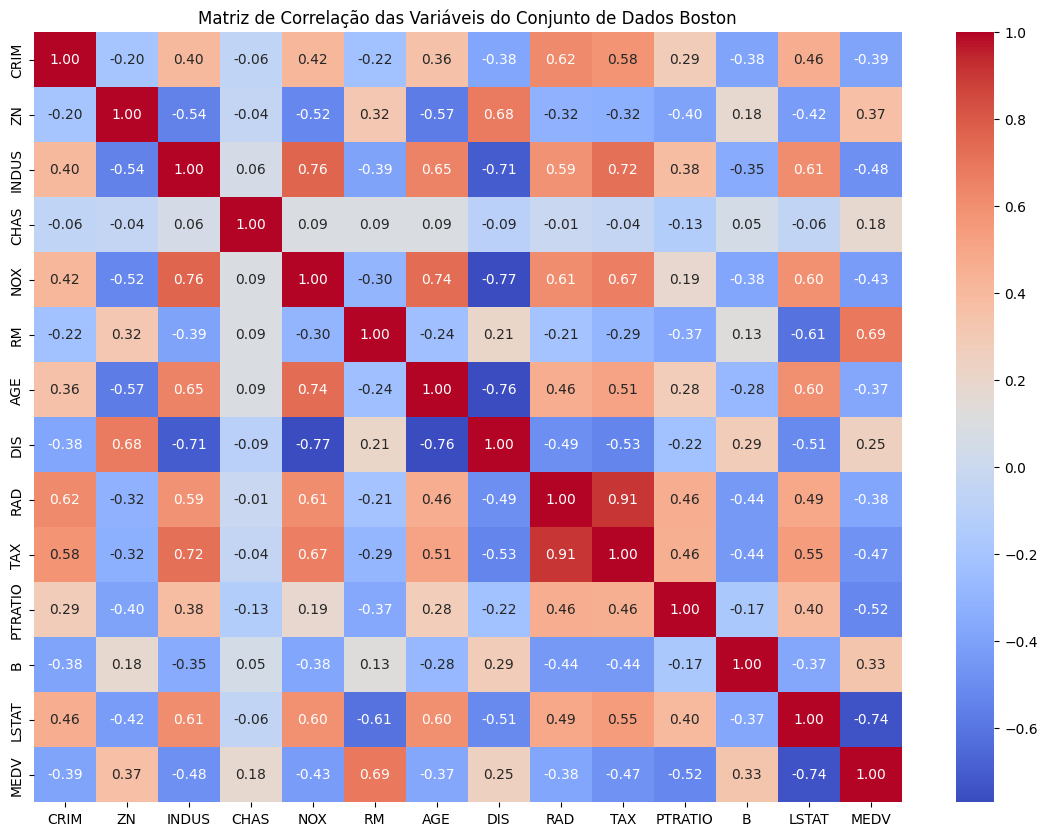

In [ ]:
# Calcular a matriz de correlação
correlation_matrix = boston.corr()

# Visualizar a matriz de correlação usando heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação das Variáveis do Conjunto de Dados Boston")
plt.show()

1. As variaveis que tem uma correlação forte negativa e positiva são as "RM", "LSTAT".



2. RM (Número médio de quartos): Mostra uma forte correlação positiva de aproximadamente 0.7 com MEDV. Isso faz sentido intuitivamente, já que casas com mais quartos são geralmente mais caras.



3. LSTAT (% de status mais baixo da população): Tem uma forte correlação negativa de aproximadamente -0.74 com MEDV. Isso indica que áreas com uma maior proporção de residentes de status socioeconômico mais baixo tendem a ter valores mais baixos de propriedade.




4. Vale observar a variavel "PTRATIO".
   
   PTRATIO (relação aluno-professor) tem uma correlação negativa moderada com MEDV, o que pode indicar que áreas com menos alunos por professor podem ter casas mais caras.

### 3. Separe os dados em validação e teste

In [ ]:
# Separar os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar as dimensões dos conjuntos de treinamento e teste
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((396, 13), (99, 13), (396,), (99,))

1. O conjunto de dados foi dividido:

   X_train: 396 amostras, 13 recursos

   X_test: 99 amostras, 13 recursos

   y_train: 396 amostras

   y_test: 99 amostras


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [ ]:
# Criar e treinar a primeira árvore com profundidade máxima de 8
tree_depth_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_depth_8.fit(X_train, y_train)

# Criar e treinar a segunda árvore com profundidade máxima de 2
tree_depth_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_depth_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [ ]:
# Fazer previsões com os modelos treinados para os conjuntos de treinamento e teste
y_train_pred_depth_8 = tree_depth_8.predict(X_train)
y_test_pred_depth_8 = tree_depth_8.predict(X_test)

y_train_pred_depth_2 = tree_depth_2.predict(X_train)
y_test_pred_depth_2 = tree_depth_2.predict(X_test)

# Calcular o MSE para cada modelo e para cada conjunto de dados
mse_train_depth_8 = mean_squared_error(y_train, y_train_pred_depth_8)
mse_test_depth_8 = mean_squared_error(y_test, y_test_pred_depth_8)

mse_train_depth_2 = mean_squared_error(y_train, y_train_pred_depth_2)
mse_test_depth_2 = mean_squared_error(y_test, y_test_pred_depth_2)

mse_train_depth_8, mse_test_depth_8, mse_train_depth_2, mse_test_depth_2

(1.796831610144895, 15.497272793488133, 26.486543873047154, 23.629055520019346)

1. Para a árvore com profundidade máxima de 8:

   MSE no conjunto de treinamento:
   1.80
   
   MSE no conjunto de teste:
   15.50



2. Para a árvore com profundidade máxima de 2:
    
   MSE no conjunto de treinamento:
   26.49

   MSE no conjunto de teste:
   23.63

3. Algumas oberservações:
   
   A árvore com profundidade 8 apresenta um MSE muito baixo no conjunto de treinamento em comparação com o conjunto de teste, o que pode ser um indicativo de overfitting.
   
   A árvore com profundidade 2 tem um MSE maior tanto no conjunto de treinamento quanto no de teste, mas a diferença entre os dois é menor, o que sugere que o modelo é mais generalizável.


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

1. Com base nos resultados do MSE, a árvore com
   profundidade máxima de 2 parece ser mais adequada para este problema, por várias razões.

2. Generalização: A árvore com profundidade 2 tem um
   MSE similar para os conjuntos de treinamento e teste, o que sugere que o modelo é mais generalizável e menos propenso a overfitting.

3. Overfitting: A árvore com profundidade 8 tem um
MSE muito baixo no conjunto de treinamento (1.80) em comparação com o conjunto de teste (15.50). Isso é um sinal clássico de overfitting, onde o modelo aprende demais os dados de treinamento e não generaliza bem para novos dados.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

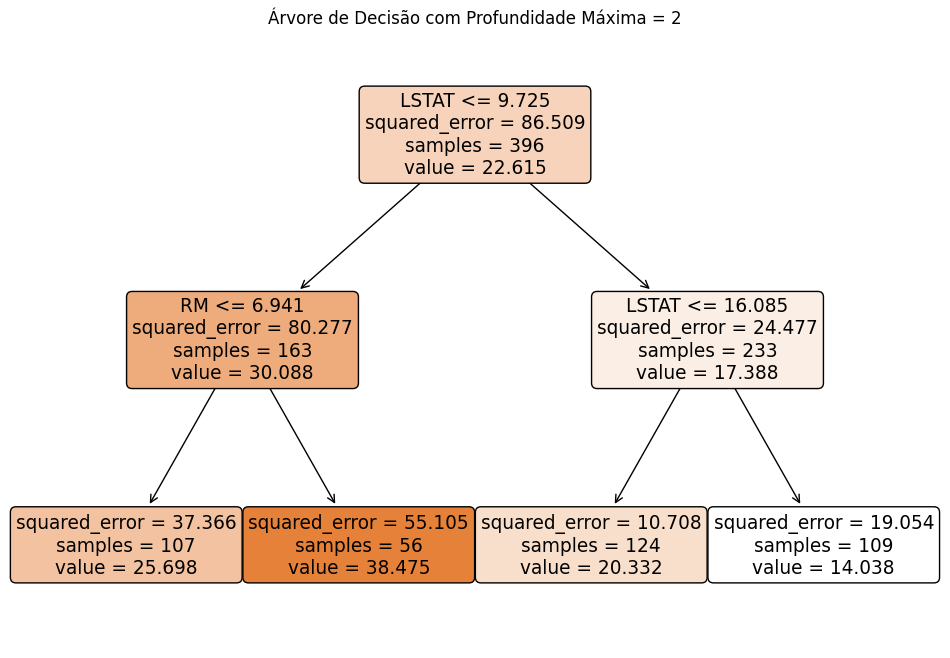

In [ ]:
# Visualizar a árvore com profundidade máxima de 2
plt.figure(figsize=(12, 8))
plot_tree(tree_depth_2, filled=True, feature_names=X.columns, rounded=True)
plt.title("Árvore de Decisão com Profundidade Máxima = 2")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


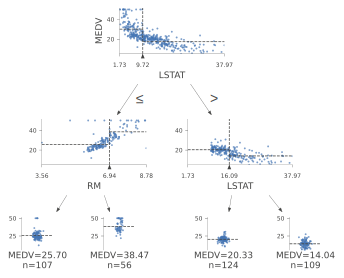

In [ ]:
viz = dtreeviz.model(tree_depth_2, X_train, y_train,
               target_name="MEDV",
               feature_names=X.columns)
v = viz.view()
v.show()
v.save("/tmp/iris.svg")
viz.view()

1. A árvore de decisão com profundidade máxima de 2 foi visualizada acima. Nesta árvore, a variável LSTAT aparece como o nó raiz, o que sugere que ela é a variável mais "importante" para essa árvore em particular. Isso está alinhado com nossa análise da matriz de correlação, onde LSTAT tinha uma correlação forte e negativa com MEDV.

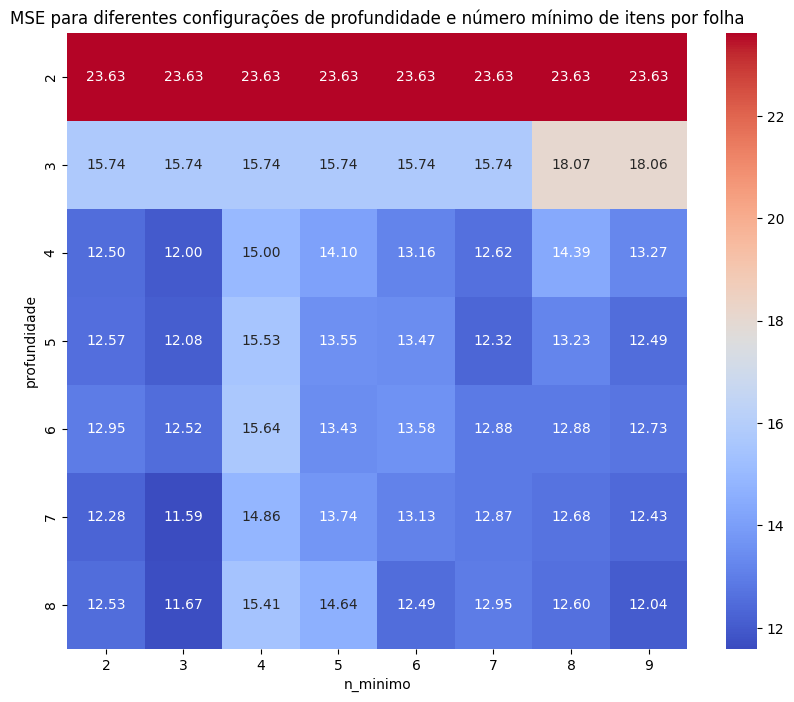

n_minimo,2,3,4,5,6,7,8,9
profundidade,,,,,,,,
2,23.629056,23.629056,23.629056,23.629056,23.629056,23.629056,23.629056,23.629056
3,15.744208,15.744208,15.744208,15.739581,15.740278,15.740832,18.065891,18.057311
4,12.503549,11.995142,15.000867,14.097748,13.155628,12.615241,14.388431,13.273600
5,12.569385,12.081064,15.530419,13.546590,13.466488,12.323134,13.227316,12.488542
6,12.950999,12.524104,15.639682,13.432900,13.575608,12.884810,12.880638,12.727883
7,12.283347,11.594270,14.855117,13.739260,13.129231,12.873954,12.676819,12.427406
8,12.525559,11.674441,15.406543,14.641318,12.492499,12.946343,12.601005,12.042928


In [ ]:
# Inicializando as listas para armazenar os resultados
mses = []
ind_i = []
ind_j = []

# Loop para treinar modelos com diferentes profundidades e números mínimos de itens por folha
for i in range(2, 9):
    for j in range(2, 10):
        # Treinando o modelo
        regr = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j, random_state=42)
        regr.fit(X_train, y_train)

        # Calculando o MSE no conjunto de teste
        mse = mean_squared_error(y_test, regr.predict(X_test))

        # Armazenando os resultados
        mses.append(mse)
        ind_i.append(i)
        ind_j.append(j)

# Criando um DataFrame para armazenar todos os resultados
df_mse = pd.DataFrame({'mses': mses, 'profundidade': ind_i, 'n_minimo': ind_j})

# Visualizando os resultados como um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_mse.pivot(index='profundidade', columns='n_minimo', values='mses'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("MSE para diferentes configurações de profundidade e número mínimo de itens por folha")
plt.show()

# Mostrando o DataFrame com os MSEs
df_mse_pivot = df_mse.pivot(index='profundidade', columns='n_minimo', values='mses')
df_mse_pivot

1. Aqui busquei entender onde diferentes combinações de profundidade da árvore e número mínimo de itens por folha afetam o Erro Quadrático Médio (MSE) no conjunto de teste.

2. A partir desses resultados, parece que uma árvore com profundidade entre 3 e 4 e um número mínimo de itens por folha entre 2 e 4 poderia ser uma boa escolha, já que essas configurações resultam em um MSE mais baixo no conjunto de teste.

In [ ]:
# Treinar a árvore de decisão com a melhor configuração encontrada: profundidade máxima = 8 e número mínimo de itens por folha = 9
best_tree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=4, random_state=42)
best_tree.fit(X_train, y_train)

# Fazer previsões com o modelo treinado para os conjuntos de treinamento e teste
y_train_pred_best = best_tree.predict(X_train)
y_test_pred_best = best_tree.predict(X_test)

# Calcular o MSE para o modelo no conjunto de treinamento e teste
mse_train_best = mean_squared_error(y_train, y_train_pred_best)
mse_test_best = mean_squared_error(y_test, y_test_pred_best)

mse_train_best, mse_test_best


(13.913712004586973, 15.744208333099934)

1. O modelo treinado com a configuração de profundidade máxima = 3 e número mínimo de itens por folha = 4 resultou nos seguintes valores de Erro Quadrático Médio (MSE):

  MSE no conjunto de treinamento:
  13.91

  MSE no conjunto de teste:
  15.74


2. O modelo apresenta um desempenho bastante consistente entre os conjuntos de treinamento e teste, o que é um bom indicativo de que ele generaliza bem para dados não vistos. O MSE para ambos os conjuntos está relativamente próximo, reduzindo as chances de overfitting.

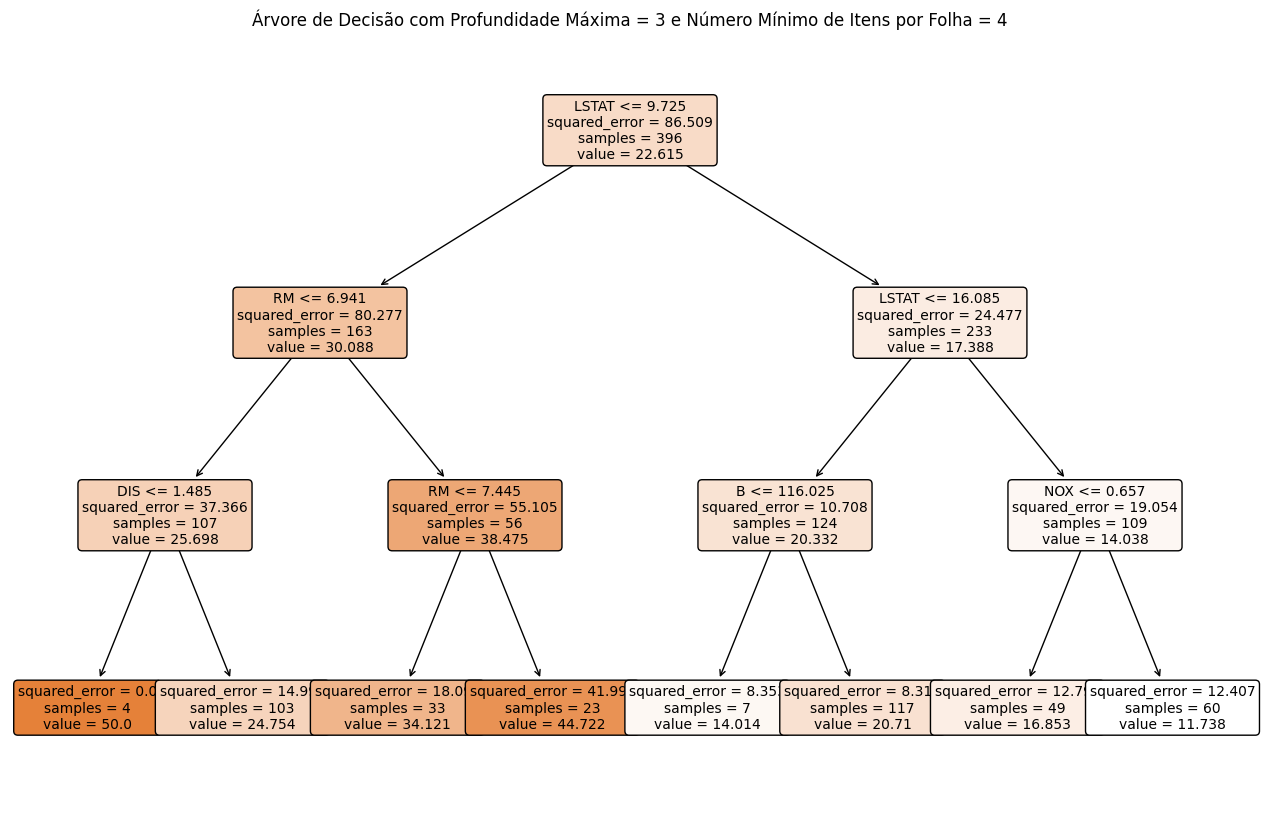

In [ ]:
# Visualizar a árvore de decisão com a melhor configuração
plt.figure(figsize=(16, 10))
plot_tree(best_tree, filled=True, feature_names=X.columns, rounded=True, fontsize=10)
plt.title("Árvore de Decisão com Profundidade Máxima = 3 e Número Mínimo de Itens por Folha = 4")
plt.show()


1. O modelo de árvore de decisão com profundidade máxima de 3 e número mínimo de itens por folha de 4 utiliza as seguintes variáveis como critérios de divisão.

2. LSTAT (% de status mais baixo da população): Este é o nó raiz da árvore, indicando que é a variável mais importante para dividir o conjunto de dados inicial. Isso faz sentido, já que áreas com maior porcentagem de pessoas de status mais baixo tendem a ter casas mais baratas, como indicado pela análise de correlação.

3. RM (Número médio de quartos por habitação): Esta variável aparece no segundo nível da árvore. A presença de mais quartos geralmente indica uma casa maior e, portanto, mais cara. Novamente, isso está alinhado com a análise de correlação que mostrou uma forte correlação positiva entre RM e MEDV.


4. DIS (Distâncias ponderadas até cinco centros de empregos em Boston): Esta variável também aparece no segundo nível da árvore, indicando que a proximidade a centros de emprego também é um fator importante na determinação do valor de uma casa. Isso pode ser interpretado como áreas mais próximas a centros de emprego sendo mais desejáveis, talvez devido a menores tempos de deslocamento.

---

1. Em resumo, o modelo captura bem algumas das intuições fundamentais sobre o mercado imobiliário:

   Áreas com uma população de menor status socioeconômico tendem a ter casas mais baratas.
   
   Casas maiores (mais quartos) tendem a ser mais caras.
   
   A proximidade a centros de emprego também parece influenciar o preço das casas.